In [1]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import sys  
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 8
from pprint import pprint
import seaborn as sns

In [2]:
# Load Data
foreign_mat = pd.read_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/Foreign_Matter.csv')
micro = pd.read_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/Micro_Screen.csv')
moisture = pd.read_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/Moisture_Content.csv')
solvent = pd.read_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/Solvent.csv')
potency = pd.read_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/potencytests.csv') 
samples = pd.read_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/Sample_lab_time.csv') 

In [3]:
# Create Test Type Column
foreign_mat['Test'] = 'Foreign Matter'
micro['Test'] = 'Micro Screen'
moisture['Test'] = 'Moisture Content'
solvent['Test'] = 'Solvent Screen'

# Combine Foreign Matter, Moisture Content and Solvent Screening
tests = pd.concat([foreign_mat, micro, moisture, solvent])
tests.sort_values('sample_id', ascending=True, inplace=True )
tests.head(20)

,sample_id,name,value,failure,location,orgid,Test
374,19,yeast_and_mold,8800.0,0,139,170,Micro Screen
373,19,bile_tolerant,0.0,0,139,170,Micro Screen
372,19,aerobic_bacteria,0.0,0,139,170,Micro Screen
74,19,moisture,6.0,0,139,170,Moisture Content
148,19,Stems,0.0,0,139,170,Foreign Matter
371,19,coliforms,0.0,0,139,170,Micro Screen
370,19,e_coli_and_salmonella,0.0,0,139,170,Micro Screen
149,19,Other,0.0,0,139,170,Foreign Matter
377,20,aerobic_bacteria,200.0,0,139,170,Micro Screen
379,20,coliforms,0.0,0,139,170,Micro Screen


In [4]:
# Subset Potency data to lab and location level only
labs = pd.DataFrame(samples, columns=['sample_id', 'test_date', 'lab_license'])
labs.sort_values('sample_id', ascending=True, inplace=True )
labs.head()

,sample_id,test_date,lab_license
0,18,6/19/2014,4
1,19,6/19/2014,4
2,20,6/19/2014,4
3,21,6/19/2014,4
4,22,6/19/2014,4


In [5]:
# Merge lab data with lab locations
merge = pd.merge(tests, labs, on='sample_id', how='left')
merge.head()

,sample_id,name,value,failure,location,orgid,Test,test_date,lab_license
0,19,yeast_and_mold,8800.0,0,139,170,Micro Screen,6/19/2014,4
1,19,bile_tolerant,0.0,0,139,170,Micro Screen,6/19/2014,4
2,19,aerobic_bacteria,0.0,0,139,170,Micro Screen,6/19/2014,4
3,19,moisture,6.0,0,139,170,Moisture Content,6/19/2014,4
4,19,Stems,0.0,0,139,170,Foreign Matter,6/19/2014,4


In [6]:
# count number of fails by lab and test type
fails = merge.groupby(['lab_license', 'Test'])['failure'].sum().reset_index()
#Lab_group = spanish.sort_values('spanish', ascending=False)
fails.head()

,lab_license,Test,failure
0,1,Foreign Matter,0
1,1,Micro Screen,148
2,1,Moisture Content,4
3,1,Solvent Screen,0
4,2,Foreign Matter,33


In [7]:
# Count the total number of tests at each lab by type
test_tot = merge.groupby(['lab_license', 'Test'])['failure'].count().reset_index()
test_tot.head()

,lab_license,Test,failure
0,1,Foreign Matter,764
1,1,Micro Screen,3810
2,1,Moisture Content,378
3,1,Solvent Screen,25
4,2,Foreign Matter,1460


In [8]:
# Merge number of fails with total number of tests
fail_merge = pd.merge(fails, test_tot, on=['lab_license','Test'], how='left')
fail_merge = fail_merge.rename(columns = {
    'failure_x':'Num Fail', 'failure_y':'Total Tests'})
# Calculate the fail rate for each lab and test type
fail_merge['Fail Rate'] = fail_merge['Num Fail']/fail_merge['Total Tests']
fail_merge.tail()

,lab_license,Test,Num Fail,Total Tests,Fail Rate
70,18,Moisture Content,0,98,0.0
71,18,Solvent Screen,0,12,0.0
72,123456,Foreign Matter,0,8,0.0
73,123456,Micro Screen,10,20,0.5
74,123456,Moisture Content,0,4,0.0


In [9]:
# Calculate the fail rate for each lab and test type
fail_merge['Fail Rate'] = fail_merge['Num Fail']/fail_merge['Total Tests']
fail_merge.tail()

,lab_license,Test,Num Fail,Total Tests,Fail Rate
70,18,Moisture Content,0,98,0.0
71,18,Solvent Screen,0,12,0.0
72,123456,Foreign Matter,0,8,0.0
73,123456,Micro Screen,10,20,0.5
74,123456,Moisture Content,0,4,0.0


In [11]:
fail_merge.to_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/fail_merge.csv', index=True)

In [9]:
# Create a pivot table
Labs_pivot2 = merge.pivot_table(values=['failure'], index=['lab_license'], columns=['Test'], aggfunc=[np.sum,len])
Labs_pivot2

sum                                               \
                   failure                                                
Test        Foreign Matter Micro Screen Moisture Content Solvent Screen   
lab_license                                                               
1                      0.0        148.0              4.0            0.0   
2                     33.0        344.0              9.0            3.0   
3                      8.0       3448.0             34.0          175.0   
4                      0.0       4537.0            186.0          244.0   
5                      0.0         55.0              0.0            6.0   
6                      1.0        476.0             83.0            1.0   
7                      0.0        103.0             14.0            0.0   
8                      2.0        290.0              1.0            0.0   
9                      0.0       1344.0              6.0           67.0   
10                     0.0        718.0             28.0           11.0   
11                     0.0        149.0             26.0            3.0   
12                    73.0       1311.0             27.0           42.0   
13                     0.0        299.0             10.0            0.0   
14                     3.0        589.0              9.0            0.0   
15                     0.0        235.0              1.0            2.0   
16                     1.0        133.0              1.0            0.0   
17                     0.0        174.0              2.0            7.0   
18                     0.0         37.0              0.0            0.0   
123456                 0.0         10.0              0.0            NaN   

                       len                                               
                   failure                                               
Test        Foreign Matter Micro Screen Moisture Content Solvent Screen  
lab_license                                                              
1                    764.0       3810.0            378.0           25.0  
2                   1460.0       9877.0            724.0         1250.0  
3                  66484.0     189285.0          32948.0         3142.0  
4                  18298.0      62251.0           9083.0         2538.0  
5                   1712.0       4815.0            851.0           92.0  
6                   5246.0      17032.0           2620.0           64.0  
7                  24342.0      68570.0          12071.0          862.0  
8                   5938.0      18365.0           2949.0          113.0  
9                  20944.0      72140.0          10443.0         2871.0  
10                  5286.0      14605.0           2628.0          298.0  
11                  1554.0       4035.0            761.0            4.0  
12                 27840.0      76130.0          13863.0          887.0  
13                  1312.0       3500.0            656.0            2.0  
14                  2278.0       7880.0           1138.0          351.0  
15                 21052.0      57620.0          10526.0          886.0  
16                   820.0       2280.0            410.0           25.0  
17                   712.0       1940.0            356.0           28.0  
18                   196.0        630.0             98.0           12.0  
123456                 8.0         20.0              4.0            NaN

In [38]:
Labs_pivot2.to_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/Lab_fail_rate.csv', index=True)

In [10]:
# df[df['languages'] != 'x'].astype(str)
solvent = merge[(merge["Test"] == "Solvent Screen")]
solvent.head()

,sample_id,name,value,failure,location,orgid,Test,test_date,lab_license
10070,1370,residual_solvent,50.0,0,168,214,Solvent Screen,9/13/2014,3
10078,1371,residual_solvent,50.0,0,168,214,Solvent Screen,9/13/2014,3
12163,1709,residual_solvent,50.0,0,168,214,Solvent Screen,9/20/2014,3
12173,1710,residual_solvent,50.0,0,168,214,Solvent Screen,9/20/2014,3
14652,2111,residual_solvent,60.0,0,433,556,Solvent Screen,9/30/2014,4


In [11]:
# Crosstab to show the number of Solvent tests each producer did at each lab
solvent_cross = pd.crosstab(solvent["location"],solvent["lab_license"],margins=True)
solvent_cross

lab_license,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,All
location,,,,,,,,,,,,,,,,,,,
126,0,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74
139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
148,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
153,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
161,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
167,0,55,147,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,271
168,0,0,95,2,0,0,0,0,24,0,0,0,0,0,0,0,0,0,121
169,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
180,0,0,21,3,0,0,12,0,0,0,0,0,0,0,16,0,0,0,52


In [42]:
solvent_cross.to_csv('C:/Users/Krista/Documents/CMU/Spring 2017/Systems/Data/solvent_cross.csv', index=True)

In [12]:
%matplotlib inline

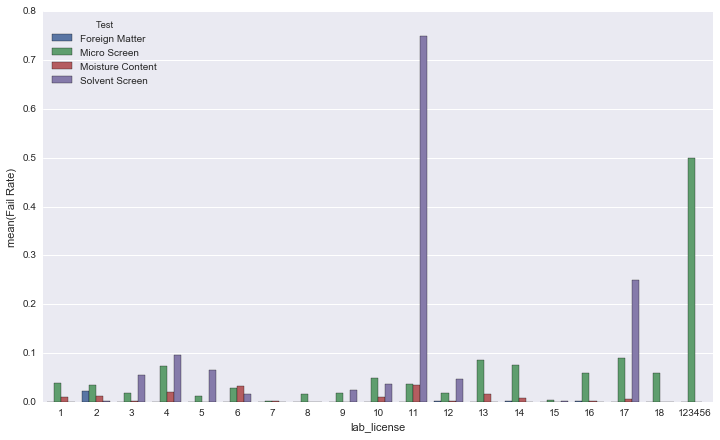

In [15]:
g = sns.barplot('lab_license', 'Fail Rate', data=fail_merge, hue='Test')
g.figure.set_size_inches(12,7)